In [50]:
import scipy.io as spio
import numpy as np
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
import h5py
import pandas as pd
Data = spio.loadmat('Folder.mat', squeeze_me=True,struct_as_record=True)
train_data=[]
train_data.append(Data['Folder1'])
train_data.append(Data['Folder2'])
train_data.append(Data['Folder3'])
train_data.append(Data['Folder4'])
train_data.append(Data['Folder5'])
train_data.append(Data['Folder6'])
train_data.append(Data['Folder7'])
train_label=np.load('train_label.npy')
merged_label=train_label[0]+train_label[1]+train_label[2]+train_label[3]+train_label[4]+train_label[5]+train_label[6]
for i in range(7):
    _,_,s=train_data[i].shape
    train_data[i]=np.reshape(train_data[i],(14,s))
    train_data[i]=train_data[i].T
    train_data[i]=np.reshape(train_data[i],(s,1,14))
    print(train_data[i].shape)
    print(len(train_label[i]))
for i in range(7):
    train_label[i]=to_categorical(train_label[i])
f=[]
f.append(h5py.File('t1.mat'))
f.append(h5py.File('t2.mat'))
f.append(h5py.File('t3.mat'))
f.append(h5py.File('t4.mat'))
f.append(h5py.File('t5.mat'))
f.append(h5py.File('t6.mat'))
f.append(h5py.File('t7.mat'))
print(len(f[0]['color']['kT'][0]))#430874.548060

(13494, 1, 14)
13494
(13494, 1, 14)
13494
(13495, 1, 14)
13495
(13497, 1, 14)
13497
(13497, 1, 14)
13497
(13496, 1, 14)
13496
(13497, 1, 14)
13497
13494


/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/user/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/user/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


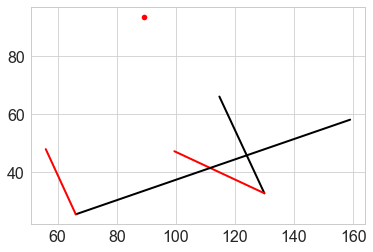

left lower length: 36.6716665431
Right lower length: 98.3966588251
left upper length: 33.7360232791
Right upper length: 24.6678857137
left elbow angle: 39.9989230816
Right elbow angle: 94.9347936892
left shoulder angle: 155.491496757
Right shoulder angle: 64.7406037461


In [51]:
import simjoints as sj
def addFeature(Data):
    s,a=Data.shape
    newData=np.zeros((s,22))
    newData[:,:14]=Data
    for i in range(s):
        newData[i,14]=((Data[i,2]-Data[i,6])**2+(Data[i,3]-Data[i,7])**2)**0.5#Left lower
        newData[i,15]=((Data[i,4]-Data[i,8])**2+(Data[i,5]-Data[i,9])**2)**0.5#Right lower
        newData[i,16]=((Data[i,6]-Data[i,10])**2+(Data[i,7]-Data[i,11])**2)**0.5#Left Upper
        newData[i,17]=((Data[i,8]-Data[i,12])**2+(Data[i,9]-Data[i,13])**2)**0.5#Right Upper
        
        v1=[Data[i,2]-Data[i,6],Data[i,3]-Data[i,7]]
        v2=[Data[i,10]-Data[i,6],Data[i,11]-Data[i,7]]
        newData[i,18]=sj.get_elbow_angle(v1,v2)#left elbow

        v1=[Data[i,4]-Data[i,8],Data[i,5]-Data[i,9]]
        v2=[Data[i,12]-Data[i,8],Data[i,13]-Data[i,9]]
        newData[i,19]=sj.get_elbow_angle(v1,v2)#right elbow

        v1=[Data[i,12]-Data[i,10],Data[i,13]-Data[i,11]]
        v2=[Data[i,6]-Data[i,10],Data[i,7]-Data[i,11]]
        newData[i,20]=sj.get_axillary_angle(v1,v2)#left shoulder
        
        v1=[Data[i,10]-Data[i,12],Data[i,11]-Data[i,13]]
        v2=[Data[i,8]-Data[i,12],Data[i,9]-Data[i,13]]
        newData[i,21]=sj.get_axillary_angle(v1,v2)#right shoulder
    return newData
test=np.reshape(train_data[0],(13494,14))
test=addFeature(test)
import matplotlib.pyplot as plt
i=1
plt.plot(test[i,0],test[i,1],'ro')#head
plt.hold(True)
plt.plot([test[i,2],test[i,6]], [test[i,3],test[i,7]], color='k', linestyle='-', linewidth=2)
plt.plot([test[i,10],test[i,6]], [test[i,11],test[i,7]], color='r', linestyle='-', linewidth=2)
plt.plot([test[i,4],test[i,8]], [test[i,5],test[i,9]], color='k', linestyle='-', linewidth=2)
plt.plot([test[i,12],test[i,8]], [test[i,13],test[i,9]], color='r', linestyle='-', linewidth=2)
plt.show()
print('left lower length:',test[i,14])
print('Right lower length:',test[i,15])
print('left upper length:',test[i,16])
print('Right upper length:',test[i,17])
print('left elbow angle:',test[i,18])
print('Right elbow angle:',test[i,19])
print('left shoulder angle:',test[i,20])
print('Right shoulder angle:',test[i,21])

In [28]:
newtrain_data=[]
for ele in train_data:
    s,_,_=ele.shape
    temp=np.reshape(ele,(s,14))
    temp=addFeature(temp)
    newtrain_data.append(temp)
    
print(len(newtrain_data))
print(newtrain_data[0].shape)
df_trainData=[]
for i in range(7):
    df_trainData.append(pd.DataFrame(np.array(newtrain_data[i])))
    df_trainData[i].to_csv('twotwoDData'+str(i+1)+'.sav', index=False)


/Users/user/Desktop/LSTMTrain/simjoints.py:17: RuntimeWarning: invalid value encountered in true_divide
  return vector / np.linalg.norm(vector)


7
(13494, 22)


[['l', 1256, 1557], ['l', 2769, 2829], ['l', 2938, 3004], ['l', 3534, 3611], ['l', 3892, 3943], ['l', 4584, 4700], ['l', 6677, 7051], ['l', 8224, 8499], ['l', 8950, 9127], ['l', 9691, 9733], ['l', 10345, 10494], ['l', 11319, 11477], ['l', 12659, 12782], ['l', 12825, 12919], ['l', 13218, 13294], ['l', 13642, 13667], ['l', 13926, 13954], ['l', 15607, 15651], ['l', 17104, 17216], ['l', 19826, 19901], ['l', 23159, 23549], ['l', 24792, 24904], ['l', 26025, 26090], ['l', 26988, 27141], ['l', 27361, 27483], ['l', 28420, 28517], ['l', 28827, 28970], ['l', 29296, 29500], ['l', 31163, 31218], ['l', 34307, 34450], ['l', 37033, 37125], ['l', 37979, 38106], ['l', 38197, 38305], ['l', 39227, 39407], ['l', 39736, 39991], ['l', 40347, 40449], ['l', 41571, 43983], ['l', 44233, 44280], ['l', 44422, 44842], ['l', 45041, 45077], ['l', 45411, 45516], ['l', 45726, 45969], ['l', 46057, 46091], ['l', 46331, 46371], ['l', 46793, 47087], ['l', 47720, 47904], ['l', 47983, 48112], ['l', 48179, 48204], ['l', 49762

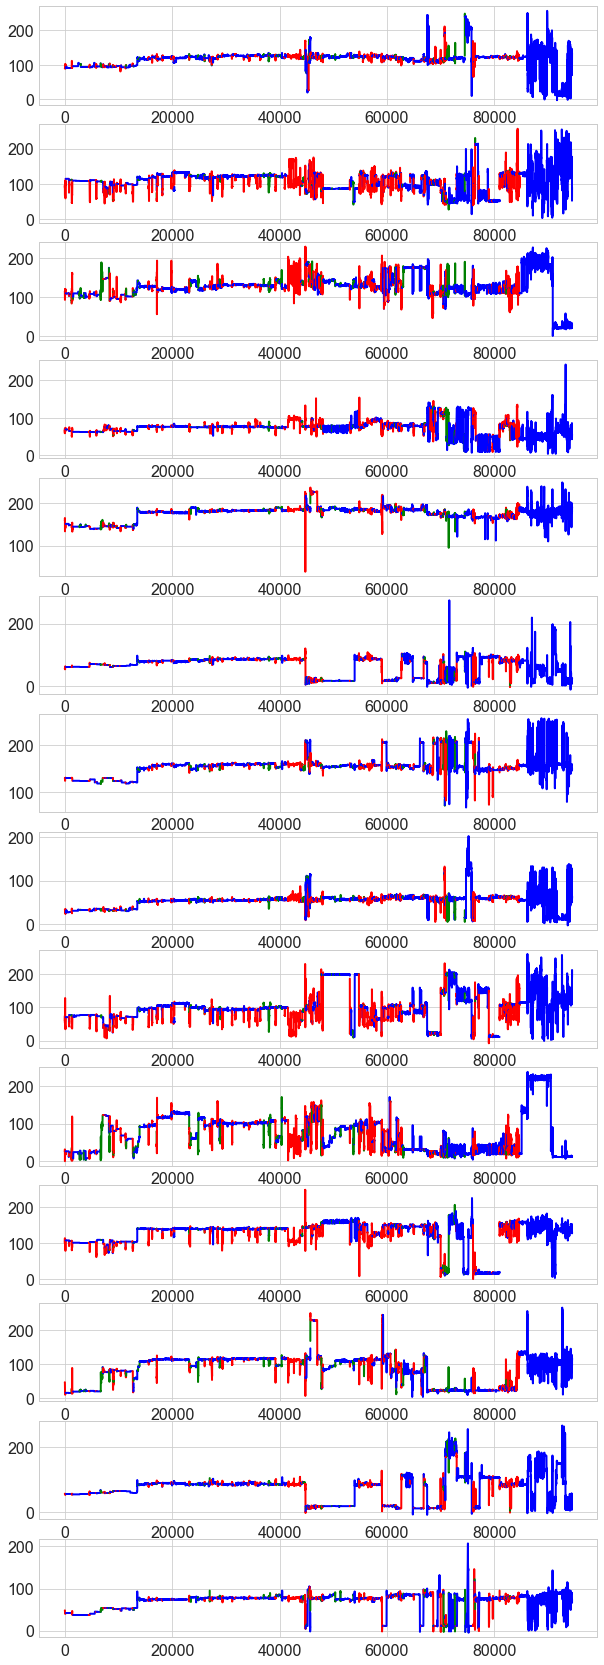

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def find_contiguous_colors(colors):
    # finds the continuous segments of colors and returns those segments
    segs = []
    curr_seg = []
    prev_color = ''
    for c in colors:
        if c == prev_color or prev_color == '':
            curr_seg.append(c)
        else:
            segs.append(curr_seg)
            curr_seg = []
            curr_seg.append(c)
        prev_color = c
    segs.append(curr_seg) # the final one
    return segs
 
def plot_multicolored_lines(x,y,colors):
    segments = find_contiguous_colors(colors)
    #plt.figure()
    start= 0
    for seg in segments:
        end = start + len(seg)
        l, = plt.gca().plot(x[start:end],y[start:end],lw=2,c=seg[0]) 
        start = end
oo=toOnOffSet(merged_label)
print(oo)
colors=['blue']*len(merged_label)
for ele in oo:
    if ele[0]=='r':
        colors[ele[1]:ele[2]]=['red']*(ele[2]-ele[1])
    elif ele[0]=='l':
        colors[ele[1]:ele[2]]=['green']*(ele[2]-ele[1])
        
        
        
temps=[]
for ele in train_data:
    s,_,_=ele.shape
    temp=np.reshape(ele,(s,14))
    temps.append(temp)
combineAll=np.concatenate((temps[:]),axis=0)
#print(combineAll.shape)
print('Blue: Still   Red: Right Moving   Green: Left Moving')
f = plt.figure(figsize=(10,30))
axs=[]
for i in range(14):
    axs.append(f.add_subplot(14,1,i+1))
    x=np.arange(len(combineAll[:,i]))
    y=combineAll[:,i]
    plot_multicolored_lines(x,y,colors)
    
plt.show()


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)
def trainLSTM(train_data,train_label,Hidden_unit,batch_s):
    model = Sequential()
    model.add(LSTM(Hidden_unit, input_shape=(1, 14)))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    for i in range(len(train_data)):
        model.fit(train_data[i],train_label[i], batch_size=batch_s, epochs=3)
    return model

## Add path to custom libraries
#module_path = '/home/kali/pgabriel-dev/thesis/scripts/python/'
#if module_path not in sys.path:
#    sys.path.append(module_path)  
#    
## Add custom libraries
#from pyFreeBe.utils import load, libviz

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
#    sns.set_context("paper", font_scale=2)
    sns.set(font_scale=2)

    fig, ax = plt.subplots(1)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 fontsize=24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.grid(False)
    
    
    
    return fig
def toIntegerLabel(l):
    label=[]
    s,_=l.shape
    for i in range(s):
        label.append(l[i].tolist().index(max(l[i].tolist())))
    return label
def toOnOffSet(integerLabel):
    onoff=[]
    lmsk = [(el==1) or (el==3) for el in integerLabel]
    Rmsk = [(el==2) or (el==3) for el in integerLabel]
    i=0
    while i<len(lmsk):
        if lmsk[i]:
            temp=[]
            temp.append('l')
            temp.append(i)
            for j in range(i,len(lmsk)):
                if not lmsk[j]:
                    temp.append(j-1)
                    onoff.append(temp)
                    i=j
                    break
        i+=1
    i=0
    while i<len(Rmsk):
        if Rmsk[i]:
            temp=[]
            temp.append('r')
            temp.append(i)
            for j in range(i,len(Rmsk)):
                if not Rmsk[j]:
                    temp.append(j-1)
                    onoff.append(temp)
                    i=j
                    break
        i+=1
    return onoff
def toPanda_test(model,train_data,whichFolder,f):
    #print(whichFolder)
    #print(model.predict(train_data[whichFolder]))
    IntegerLabel=toIntegerLabel(model.predict(train_data[whichFolder]))
    OnOff=toOnOffSet(IntegerLabel)
    df=[]
    for i in range(len(OnOff)):
        OnOff[i][1]=f[whichFolder]['color']['kT'][0][OnOff[i][1]]/1000
        OnOff[i][2]=f[whichFolder]['color']['kT'][0][OnOff[i][2]]/1000
        df.append(pd.DataFrame(data={'onset':[OnOff[i][1]],  'offset':[OnOff[i][2]],  'label':[OnOff[i][0]]}))
    df = pd.concat(df, axis=0)
    df.sort_values(by=('onset'), inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df
def toPanda_train(train_label,whichFolder,f):
    IntegerLabel=toIntegerLabel(train_label[whichFolder])
    OnOff=toOnOffSet(IntegerLabel)
    df=[]
    for i in range(len(OnOff)):
        OnOff[i][1]=f[whichFolder]['color']['kT'][0][OnOff[i][1]]/1000
        OnOff[i][2]=f[whichFolder]['color']['kT'][0][OnOff[i][2]]/1000
        df.append(pd.DataFrame(data={'onset':[OnOff[i][1]],  'offset':[OnOff[i][2]],  'label':[OnOff[i][0]]}))
    df = pd.concat(df, axis=0)
    df.sort_values(by=('onset'), inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df
#print(toPanda_test(model,train_data,0,f))
#print(toPanda_train(train_label,0,f))
def score_periods(df_manual, df_pred, params=None, err1thresh=2, err2thresh=5):
    
    # initialize storage variables/arrays
    err1 = np.empty(len(df_manual)) # err1
    err2 = np.empty(len(df_manual)) # err2
    detected = np.zeros(len(df_manual), dtype=bool) # detected
    
    # Loop through each manual
    for i, (label, offset, onset) in df_manual.iterrows():
                
        # search for nearest neighbor in df_pred
        pred_onsets = df_pred['onset'].values
        pred_offsets = df_pred['offset'].values
        
        i_onset_match = np.argmin(np.abs(pred_onsets-onset))
        i_offset_match = np.argmin(np.abs(pred_offsets - offset))
        
        if label=='b' or i_onset_match != i_offset_match:
            err1[i] = np.nan
            err2[i] = np.nan
            detected[i] = False
            continue
        
        # calculate onset and offset error (err1, err2)
        err1[i] = onset - pred_onsets[i_onset_match]
        err2[i] = offset - pred_offsets[i_offset_match]
        if np.abs(err1[i])>err1thresh or np.abs(err2[i])>err2thresh:
            detected[i] = False
        else:
            detected[i]=True

    df_return = df_manual.copy()
    df_return['err1'] = err1
    df_return['err2'] = err2
    df_return['detected'] = detected
    
    return df_return

In [47]:
## Changing Params Here
def trainning(train_data, train_label,f,params):
    result=[]
    pred=[]
    for i in range(4):
        train_set=[]
        train_set_label=[]
        test_folder=i
        for j in range(4):
            if j!=i:
                train_set.append(train_data[j])
                train_set_label.append(train_label[j])
        model=trainLSTM(train_set, train_set_label, params[0],params[1])
        df_manual=toPanda_train(train_label,test_folder,f)
        df_pred=toPanda_test(model,train_data,test_folder,f)
        df_results = score_periods(df_manual, df_pred)
        pred.append(df_pred)
        result.append(df_results)
    return result,pred
def evaResult(results):
    total_event=0.0
    total_detected=0.0
    total_err1=0.0
    total_err2=0.0
    for result in results:
        total_event+=len(result)
        total_detected+=sum(result['detected'])
        for i in range(len(result)):
            if result['detected'][i]:
                total_err1+=np.abs(result['err1'][i])
                total_err2+=np.abs(result['err2'][i])
    return (total_detected/total_event,total_err1/total_event,total_err2/total_event)

In [48]:
params=[64,15]
result,pred=trainning(train_data,train_label,f,params)

Epoch 1/3
13494/13494 [==============================] - 8s 578us/step - loss: 0.4454 - acc: 0.8995
Epoch 2/3
13494/13494 [==============================] - 7s 533us/step - loss: 0.3652 - acc: 0.9077
Epoch 3/3
13494/13494 [==============================] - 8s 567us/step - loss: 0.3543 - acc: 0.9122
Epoch 1/3
13495/13495 [==============================] - 8s 562us/step - loss: 0.6777 - acc: 0.7936
Epoch 2/3
13495/13495 [==============================] - 8s 581us/step - loss: 0.6664 - acc: 0.8030
Epoch 3/3
13495/13495 [==============================] - 8s 580us/step - loss: 0.6505 - acc: 0.8049
Epoch 1/3
13497/13497 [==============================] - 7s 552us/step - loss: 0.8185 - acc: 0.7183
Epoch 2/3
13497/13497 [==============================] - 8s 574us/step - loss: 0.7261 - acc: 0.7545
Epoch 3/3
13497/13497 [==============================] - 7s 532us/step - loss: 0.6707 - acc: 0.7799
Epoch 1/3
13494/13494 [==============================] - 8s 571us/step - loss: 0.8419 - acc: 0.7413


In [49]:
#pred[0].to_pickle('df_pred1.dat')
#pred[1].to_pickle('df_pred2.dat')
#pred[2].to_pickle('df_pred3.dat')
#pred[3].to_pickle('df_pred4.dat')
#a=pd.read_pickle('df_pred1.dat')
print(evaResult(result))
for i in range(4):
    print(evaResult([result[i]]))

(0.19444444444444445, 0.16479451759261321, 0.50370034629466121)
(0.13793103448275862, 0.12178719655112845, 0.24369589999872099)
(0.20000000000000001, 0.17999674999737181, 0.70328975000011273)
(0.25925925925925924, 0.1925579111126286, 0.7209921518526109)
(0.1875, 0.17084314375097165, 0.43124603749492962)


20.0
20
Confusion matrix, without normalization
[[20  0]
 [ 4  0]]
MSE1: 8482.99661532 [s], MSE: 9121.94570157 [s]


/home/nathan/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nathan/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.0 1.2


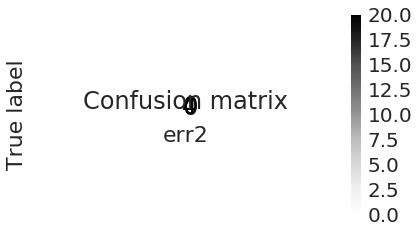